<a href="https://colab.research.google.com/github/Ksenia-90/Data_analysis_algorithms/blob/lesson_2/lesson_2_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

In [69]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn. datasets import make_regression

%matplotlib inline

In [70]:
data1, target =  make_regression(1000, 2)
data1[:,0] = data1[:,0]*10


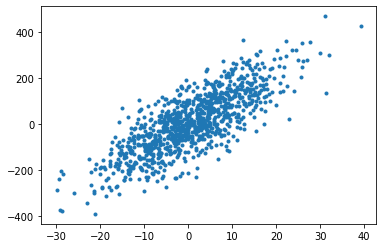

In [71]:
plt.plot(data1[:,0],target,'.')

In [72]:
data1[1].min(), data1[1].max()

(-11.388331177807691, 0.6222071440434019)

In [73]:
data1[2].min(), data1[2].max()

(0.5689830791852754, 16.28396623128538)

In [74]:
X_norm = data1.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[ -6.50023934,  -1.49652926],
       [-11.38833118,   0.62220714],
       [ 16.28396623,   0.56898308],
       ...,
       [ -2.0931382 ,   0.68332899],
       [ 10.0751369 ,  -1.86653995],
       [  5.00844475,   0.6380511 ]])

In [75]:
X_norm[1] = (data1[1] - data1[1].min()) / (data1[1].max() - data1[1].min())
X_norm

array([[-6.50023934, -1.49652926],
       [ 0.        ,  1.        ],
       [16.28396623,  0.56898308],
       ...,
       [-2.0931382 ,  0.68332899],
       [10.0751369 , -1.86653995],
       [ 5.00844475,  0.6380511 ]])

In [76]:
X_norm[2] = (data1[2] - data1[2].min()) / (data1[2].max() - data1[2].min())
X_norm

array([[-6.50023934, -1.49652926],
       [ 0.        ,  1.        ],
       [ 1.        ,  0.        ],
       ...,
       [-2.0931382 ,  0.68332899],
       [10.0751369 , -1.86653995],
       [ 5.00844475,  0.6380511 ]])

In [77]:
X_st = data1.copy().astype(np.float64)
X1_mean = data1[1].mean()
X1_std = data1[1].std()
print(X1_mean, X1_std)

-5.383062016882144 6.005269160925546


In [78]:
X_st[1] = (data1[1] - X1_mean) / X1_std
X_st

array([[-6.50023934, -1.49652926],
       [-1.        ,  1.        ],
       [16.28396623,  0.56898308],
       ...,
       [-2.0931382 ,  0.68332899],
       [10.0751369 , -1.86653995],
       [ 5.00844475,  0.6380511 ]])

In [79]:
def calc_std_fit(data1):
    res = (data1 - data1.mean()) / data1.std()
    return res


In [80]:
X_st[2] = calc_std_fit(data1[2])

In [81]:
X_st[3] = calc_std_fit(data1[3])
X_st

array([[-6.50023934, -1.49652926],
       [-1.        ,  1.        ],
       [ 1.        , -1.        ],
       ...,
       [-2.0931382 ,  0.68332899],
       [10.0751369 , -1.86653995],
       [ 5.00844475,  0.6380511 ]])

In [82]:
means = np.mean(data1, axis=0)
stds = np.std(data1, axis=0)
data = data1.copy() 
for i in range(data1.shape[0]):
    for j in range(data1.shape[1]):
        data[i][j] = (data[i][j] - means[j])/stds[j]

In [83]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.linear_model import LinearRegression

In [84]:
data1_test, target_test = datasets.make_regression(1000, 2) 
data1_test[:,0] = data1_test[:,0]*10
data_test = data1_test.copy() 
for i in range(data1_test.shape[0]):
    for j in range(data1_test.shape[1]):
        data_test[i][j] = (data_test[i][j] - means[j])/stds[j]

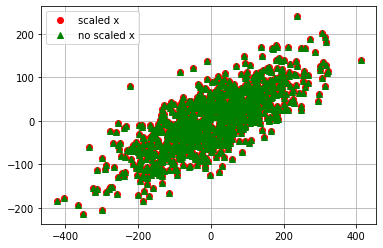

In [85]:
c_lr1 = LinearRegression().fit(data1,target)
c_lr = LinearRegression().fit(data,target)

y1 = c_lr1.predict(data1_test[:1000,:])
y = c_lr.predict(data_test[:1000,:])

plt.plot(y,target_test[:1000],'or', label = 'scaled x')
plt.plot(y1,target_test[:1000],'^g', label = 'no scaled x')
plt.legend()
plt.grid(True)
plt.show()


In [86]:
e1 = np.mean(np.abs(y-target_test))
e = np.mean(np.abs(y1-target_test))
e,e1

(70.13886264193955, 70.1388626419396)

In [87]:
c_lr1.coef_, c_lr.coef_

(array([ 9.83567207, 81.87402295]), array([99.41473722, 79.39363348]))

In [88]:
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [89]:
def model(data1, target, iterations, alpha=1e-4):
    W = np.random.randn(data1.shape[0])
    n = data1.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = mserror(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [90]:
model(X_st, target, iterations=0, alpha=1e-2)

array([-7.93294332e-01,  4.32844554e-01, -5.00676401e-01,  1.57151871e-01,
       -1.21369531e+00, -3.48459373e-01,  1.63385705e-01, -9.51472516e-01,
        1.68636348e+00, -6.37423913e-01,  1.37841679e+00, -1.67805545e-01,
       -1.56847557e+00, -1.13690081e+00,  1.76079289e-01,  1.03277575e+00,
        1.76977713e+00,  1.28218729e-01, -1.17724375e+00,  2.78485081e-01,
       -8.25214673e-01,  3.92191621e-01, -9.41474552e-01, -2.08957024e+00,
        1.31685566e+00, -2.26416731e-01,  4.96603338e-02,  9.96701374e-01,
        1.87884671e+00,  7.20080652e-01,  1.03001616e-01,  4.62872876e-01,
       -2.94783043e-01,  3.61143785e-02,  1.44863638e-01, -7.86625257e-01,
        2.11735869e-02,  3.67101853e-01,  5.17016898e-01,  4.37323782e-01,
       -1.33902522e+00,  1.22925894e+00,  1.14628123e+00, -9.61484082e-02,
        4.55508695e-01, -2.16553767e-01,  7.51957663e-01, -8.14271846e-01,
        1.34246060e+00,  7.02207612e-01,  7.25433792e-01, -1.05052876e-01,
       -1.41261850e+00,  

In [91]:
w = np.random.randn(2) 
w_list = [w.copy()]
errors = []
eta = 0.15
max_iter = 1e5
min_weight_dist = 1e-8
weight_dist = np.inf
iter_num = 0
lamb = 0.01 
np.random.seed(1234)
Q = [0]  
while weight_dist > min_weight_dist and iter_num < max_iter:
    
   
    train_ind = np.random.randint(data.shape[0])
    
    new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]
 
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors.append(mserror(data, new_w, target))
    Q.append(Q[-1]*(1-lamb)+lamb*(np.dot(data[train_ind], w) - target[train_ind])**2)
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)
 
print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

В случае использования стохастического градиентного спуска функционал ошибки составляет 50.5264


Text(0, 0.5, 'MSE')

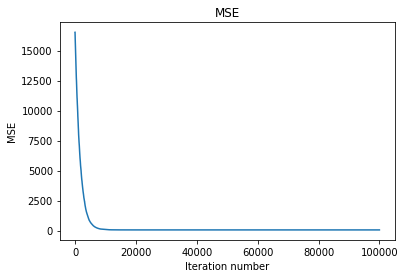

In [92]:
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

In [93]:
def model_reg2(data1, target, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(data1.shape[0])
    n = data1.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = mserror(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), data1.T) + lambda_ * W) 
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [94]:
model_reg2(X_st, target, iterations=0, alpha=1e-2, lambda_=1e-4)

array([ 4.96714153e-01, -1.38264301e-01,  6.47688538e-01,  1.52302986e+00,
       -2.34153375e-01, -2.34136957e-01,  1.57921282e+00,  7.67434729e-01,
       -4.69474386e-01,  5.42560044e-01, -4.63417693e-01, -4.65729754e-01,
        2.41962272e-01, -1.91328024e+00, -1.72491783e+00, -5.62287529e-01,
       -1.01283112e+00,  3.14247333e-01, -9.08024076e-01, -1.41230370e+00,
        1.46564877e+00, -2.25776300e-01,  6.75282047e-02, -1.42474819e+00,
       -5.44382725e-01,  1.10922590e-01, -1.15099358e+00,  3.75698018e-01,
       -6.00638690e-01, -2.91693750e-01, -6.01706612e-01,  1.85227818e+00,
       -1.34972247e-02, -1.05771093e+00,  8.22544912e-01, -1.22084365e+00,
        2.08863595e-01, -1.95967012e+00, -1.32818605e+00,  1.96861236e-01,
        7.38466580e-01,  1.71368281e-01, -1.15648282e-01, -3.01103696e-01,
       -1.47852199e+00, -7.19844208e-01, -4.60638771e-01,  1.05712223e+00,
        3.43618290e-01, -1.76304016e+00,  3.24083969e-01, -3.85082280e-01,
       -6.76922000e-01,  